## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing dataset
dataset=pd.read_csv('drive/MyDrive/ML Work/covid.csv')
dataset.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [ ]:
dataset['icu'].unique

<bound method Series.unique of 0         97
1         97
2          2
3          2
4          2
          ..
566597    97
566598    97
566599     2
566600    97
566601    97
Name: icu, Length: 566602, dtype: int64>

Pre Processing

In [ ]:
#mapping category 97 and 98 of icu with 3

dataset['icu']= dataset['icu'].map({1:1,2:2,97:3,99:3})
dataset.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,3
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,3
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [ ]:
#dropping the icu values where value == 3 which are NA's  

dropindex=dataset[dataset['icu']==3].index
dataset.drop(dropindex,inplace=True)

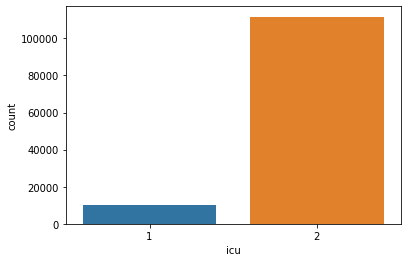

In [ ]:
#icu count for category 1 and 2
sns.countplot(x='icu', data= dataset)

In [ ]:
#drop id and patient type column
dataset.drop(['id', 'patient_type'], axis=1, inplace=True)
dataset.head()

,sex,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,22-04-2020,13-04-2020,9999-99-99,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


In [ ]:
#drop dates column which is not required
dataset.drop(['entry_date','date_symptoms','date_died'],axis=1,inplace=True)
dataset.head()

,sex,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
2,1,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,2,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,1,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
5,2,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1
6,2,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2


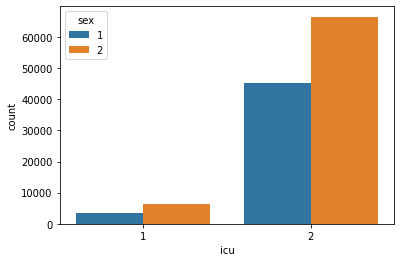

In [ ]:
sns.countplot(x='icu',data=dataset,hue='sex')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


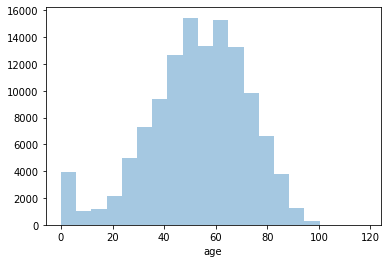

In [ ]:
sns.distplot(dataset['age'],kde=False,bins=20)

Text(0.5, 1.0, 'pneumonia')

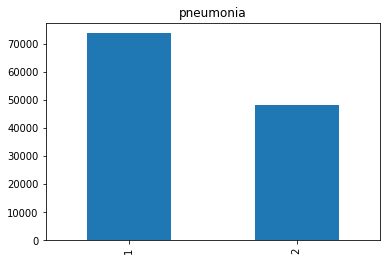

In [ ]:
dataset=dataset[dataset['pneumonia']!=99]
dataset['pneumonia'].value_counts().sort_index().plot.bar()
plt.title('pneumonia')

Text(0.5, 1.0, 'Pregnancy')

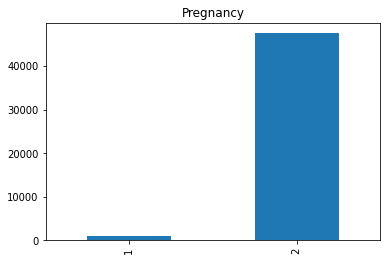

In [ ]:
dataset=dataset[dataset['pregnancy']!=97]
dataset=dataset[dataset['pregnancy']!=98]
dataset['pregnancy'].value_counts().sort_index().plot.bar()
plt.title('Pregnancy')

Text(0.5, 1.0, 'Diabetes')

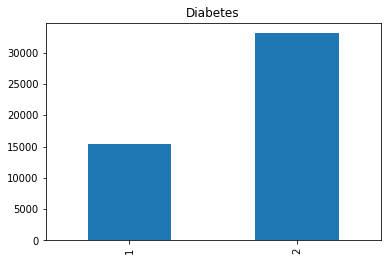

In [ ]:
dataset=dataset[dataset['diabetes']!=98]
dataset['diabetes'].value_counts().sort_index().plot.bar()
plt.title('Diabetes')

Text(0.5, 1.0, 'Asthma')

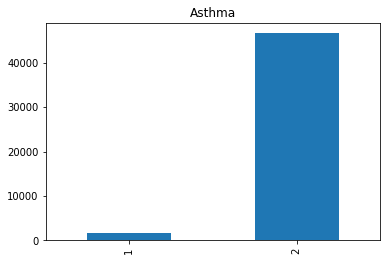

In [ ]:
dataset=dataset[dataset['asthma']!=98]
dataset['asthma'].value_counts().sort_index().plot.bar()
plt.title('Asthma')

Text(0.5, 1.0, 'Hypertension')

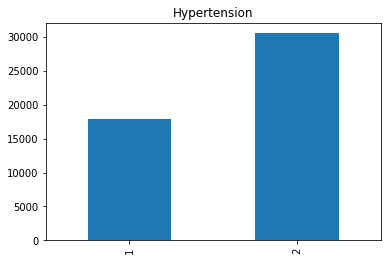

In [ ]:
dataset=dataset[dataset['hypertension']!=98]
dataset['hypertension'].value_counts().sort_index().plot.bar()
plt.title('Hypertension')

Text(0.5, 1.0, 'Obesity')

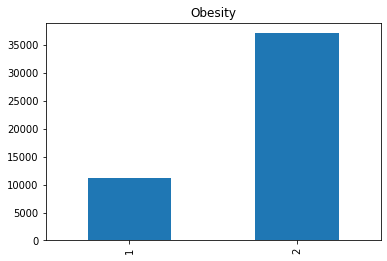

In [ ]:
dataset=dataset[dataset['obesity']!=98]
dataset['obesity'].value_counts().sort_index().plot.bar()
plt.title('Obesity')

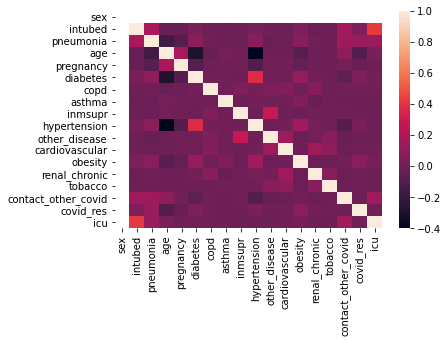

In [ ]:
sns.heatmap(dataset.corr())

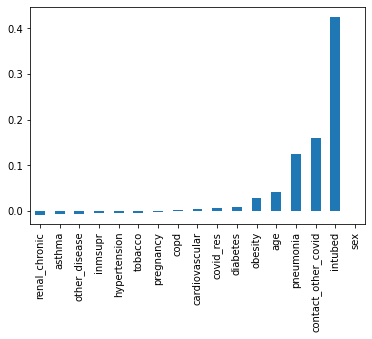

In [ ]:
dataset.corr()['icu'][:-1].sort_values().plot(kind='bar')

## Splitting Dataset into Training and Test set

In [ ]:
X = dataset.drop('icu',axis=1)
y = dataset['icu']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(33815, 17)

In [ ]:
X_test.shape

(14493, 17)

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_score=rfc.score(X_test, y_test)
print("The accuracy of Random Forest Classifier is: " ,rfc_score)

The accuracy of Random Forest Classifier is:  0.9183743876354102


In [ ]:
rfc_pred = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           1       0.38      0.23      0.29      1034
           2       0.94      0.97      0.96     13459

    accuracy                           0.92     14493
   macro avg       0.66      0.60      0.62     14493
weighted avg       0.90      0.92      0.91     14493

[[  242   792]
 [  391 13068]]


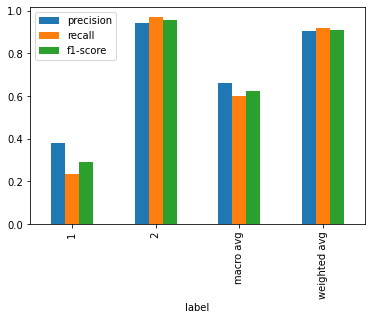

In [ ]:
import pandas as pd

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, rfc_pred.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           1       0.28      0.26      0.27      1034
           2       0.94      0.95      0.95     13459

    accuracy                           0.90     14493
   macro avg       0.61      0.61      0.61     14493
weighted avg       0.90      0.90      0.90     14493

[[  273   761]
 [  700 12759]]


In [ ]:
dtc_score=dtree.score(X_test, y_test)
print("Accuracy of Decision Tree Classifier is: ", dtc_score)

Accuracy of Decision Tree Classifier is:  0.8991927137238667


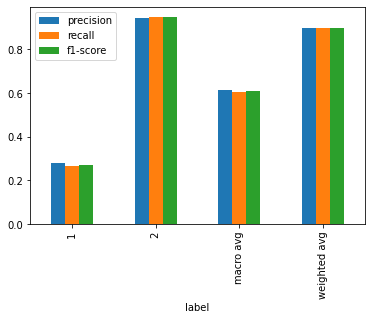

In [ ]:
import pandas as pd

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, predictions.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier(random_state=100, n_estimators=150,min_samples_split=100, max_depth=6)
gbk.fit(X_train, y_train)
gbk_predict = gbk.predict(X_test)
gbk_score = gbk.score(X_test,y_test)
print("Gradient Boosting Score :",gbk_score)

Gradient Boosting Score : 0.9296901952666805


In [ ]:
print(classification_report(y_test,gbk_predict))
print(confusion_matrix(y_test,gbk_predict))

              precision    recall  f1-score   support

           1       0.52      0.22      0.31      1034
           2       0.94      0.98      0.96     13459

    accuracy                           0.93     14493
   macro avg       0.73      0.60      0.64     14493
weighted avg       0.91      0.93      0.92     14493

[[  226   808]
 [  211 13248]]


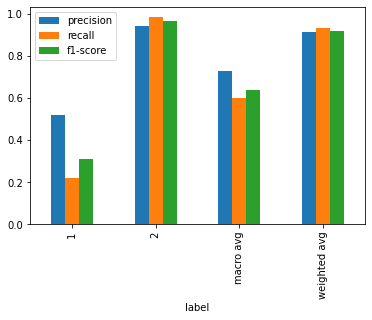

In [ ]:
import pandas as pd

# Build a DataFrame from the classification_report output_dict.
report_data = []
for label, metrics in classification_report(y_test, gbk_predict.round(), output_dict=True).items():
  if label!= 'accuracy':
    metrics['label'] = label
    report_data.append(metrics)

report_df = pd.DataFrame(
    report_data, 
    columns=['label', 'precision', 'recall', 'f1-score', 'support']
)

# Plot as a bar chart.
report_df.plot(y=['precision', 'recall', 'f1-score'], x='label', kind='bar')

## Conclusion

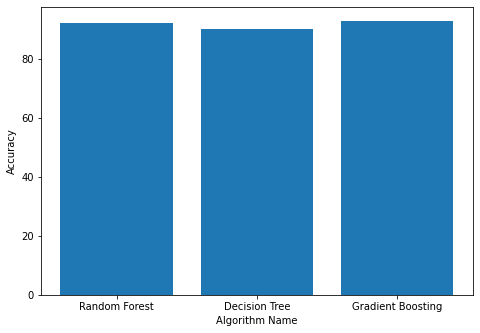

In [ ]:
from numpy import median
#import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure()
ax=fig.add_axes([1, 1, 1, 1])

acc=[92, 90, 93]
algo_name=['Random Forest', 'Decision Tree', 'Gradient Boosting']

ax.bar(algo_name, acc)
ax.set_xlabel('Algorithm Name')
ax.set_ylabel('Accuracy')
plt.show()